# Part 1

In [72]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [73]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) Gecko/20100101 Firefox/24.0' }
r = requests.get(url, headers=headers).text

In [74]:
data = bs(r, features="html")
container = data.find('table',{"class":"wikitable"})
rows = container.findAll('tr')


In [75]:
# create dataframe
df_columns = ['PostalCode','Borough','Neighborhood']
df = pd.DataFrame(columns = df_columns)

In [76]:
# Loop in the table
for row in rows:
    code_list = []
    for td in row.find_all('td'):
        content = td.text.strip()
        code_list.append(content)
        if len(code_list) == 3:
            df.loc[len(df)] = code_list

In [77]:
df = df[df['Borough'] != 'Not assigned']
df.loc[df['Neighborhood'] == 'Not assigned', "Neighborhood"] = df['Borough']
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### No need to group as the data is already grouped by wikipedia

In [74]:
# df = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [78]:
df.shape

(103, 3)

# Part 2

In [79]:
# read the CSV file with Geaspatial data
g_url = "http://cocl.us/Geospatial_data"
g_df = pd.read_csv(g_url)
g_df = g_df.rename(columns={"Postal Code": "PostalCode"})
g_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [80]:
# map latitude and longitude to our main dataframe
new_df = pd.merge(df, g_df, on ='PostalCode', how ='left')

new_df.head() 

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# Part 3

In [81]:
# create geometry points column from latituge and longitude using geopandas GeoDataFrame

%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(new_df, geometry=geopandas.points_from_xy(new_df.Longitude, new_df.Latitude))
gdf.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,geometry
0,M3A,North York,Parkwoods,43.753259,-79.329656,POINT (-79.32966 43.75326)
1,M4A,North York,Victoria Village,43.725882,-79.315572,POINT (-79.31557 43.72588)
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,POINT (-79.36064 43.65426)
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,POINT (-79.46476 43.71852)
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,POINT (-79.38949 43.66230)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


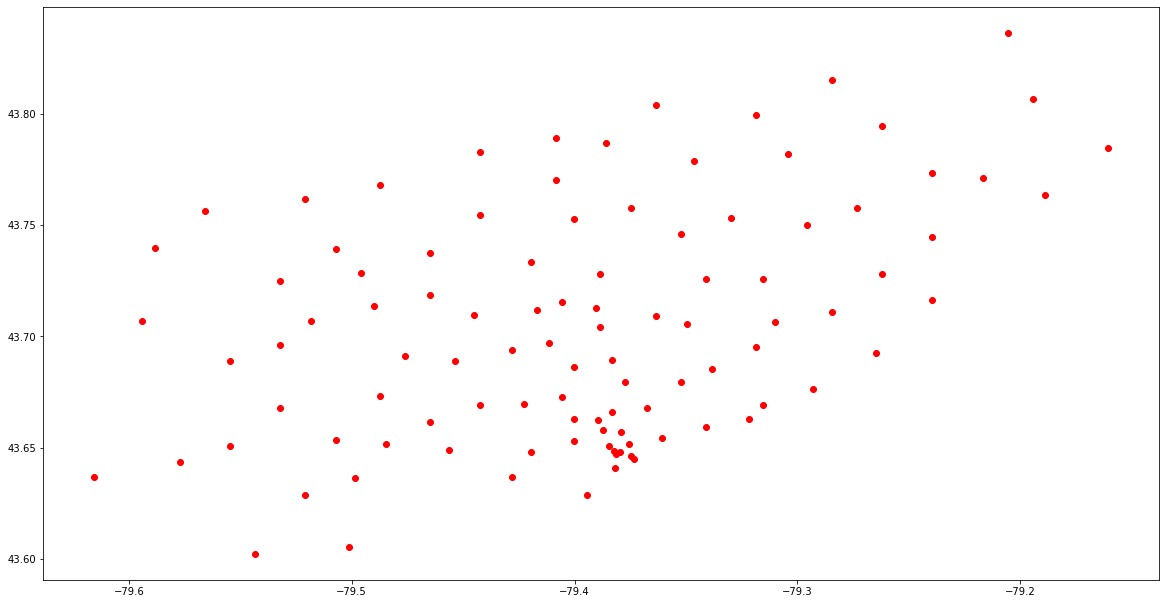

In [82]:
# create points coordinates on the Toronto map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='k', figsize=(20, 13))

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()